# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

**A. Preliminary Steps** 

##### A.0 Packages/Utilities

In [1]:
#Packages/Utilities
import requests
import csv
from contextlib import closing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
HOME = str(Path.home())

import pandas_profiling as pp

#run the header syntax 
headers = { "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" }
#Note(per teacher): you'll need to fetch the data using the following syntax to include headers that make the web server think you're a real web browser.


##### A.1 Data Access, Formats & Cleaning (importing all 3 data sets here, but will focus on just the CHR for the wk 13.2 assignment)

In [2]:
#Data Access & Formats
#Bring in the CHR, amfAR & USDA data sets

#(1 - County Health Rankings Data) - Web File in CSV format
# Define the remote URL
url1 = "https://www.countyhealthrankings.org/sites/default/files/analytic_data2018_0.csv"
with closing(requests.get(url1, stream=True)) as r:
    f1 = (line.decode('utf-8') for line in r.iter_lines())
    csv_reader1 = csv.reader(f1, delimiter=',', quotechar='"')
    for row in csv_reader1:
        #print(row)
        df_chr = pd.DataFrame(csv_reader1)

print(df_chr.shape)
df_chr.head()

(3195, 508)


,0,1,2,3,4,5,6,7,8,9,...,498,499,500,501,502,503,504,505,506,507
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2018,,6658.1139453,3537400,896862151,...,,,,,,,,,,
2,01,000,01000,AL,Alabama,2018,,9642.4120328,76851,13617223,...,,,,,,,,,,
3,01,001,01001,AL,Autauga County,2018,1,9409.2947663,851,156697,...,,,,,,,,,,
4,01,003,01003,AL,Baldwin County,2018,1,7467.5966638,2740,554671,...,,,,,,,,,,


In [3]:
#(2 - amfAR Data) - Local Desktop File in CSV format
file_to_open = Path.home()/'hds5210-2022/final/amfARDB_dist_MAT_countydata_2019-08-30.csv'
df_amfar = pd.read_csv(file_to_open)

print(df_amfar.shape)
df_amfar.head()

(3214, 8)


,STATE,STATEABBREVIATION,COUNTY,STATEFP,COUNTYFP,INDICATOR,YEAR,VALUE
0,Alabama,AL,Autauga County,1,1,dist_MAT,2017,23.50
1,Alabama,AL,Baldwin County,1,3,dist_MAT,2017,19.68
2,Alabama,AL,Barbour County,1,5,dist_MAT,2017,17.00
3,Alabama,AL,Bibb County,1,7,dist_MAT,2017,19.00
4,Alabama,AL,Blount County,1,9,dist_MAT,2017,13.62


In [4]:
#(3 - rurality Data)- Web File in XLS format
url2 = 'https://www.ers.usda.gov/webdocs/DataFiles/53251/ruralurbancodes2013.xls?v=4386'
r = requests.get(url2)
open('temp.xls', 'wb').write(r.content)
df_rural = pd.read_excel('temp.xls')

print(df_rural.shape)
df_rural.head()

(3234, 6)


,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1.0,Metro - Counties in metro areas of 1 million p...


In [5]:
#Next Some Data Management/Cleaning

##### Data Cleaning

In [6]:
#(1 - County Health Rankings Data)
#convert the first row to column header 
# Assign row as column headers
df_chr.columns = df_chr.iloc[0]

#Convert row to header and remove the row
df_chr2 = df_chr.rename(columns=df_chr.iloc[0]).loc[1:]

print(df_chr2.shape)
df_chr2.head()

(3194, 508)


,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2018,,6658.1139453,3537400,896862151,...,,,,,,,,,,
2,01,000,01000,AL,Alabama,2018,,9642.4120328,76851,13617223,...,,,,,,,,,,
3,01,001,01001,AL,Autauga County,2018,1,9409.2947663,851,156697,...,,,,,,,,,,
4,01,003,01003,AL,Baldwin County,2018,1,7467.5966638,2740,554671,...,,,,,,,,,,
5,01,005,01005,AL,Barbour County,2018,1,8929.4749816,425,75161,...,,,,,,,,,,


In [7]:
#drop all rows with countycode=0 (these are US & state aggregates... not needed)
df_chr3 = df_chr2[df_chr2['countycode'] != str('000')]

df_chr3.head()
df_chr3.shape

(3142, 508)

In [8]:
#check that the drops are accurate
df_drops = df_chr2[df_chr2['countycode'] == str('000')]

print(df_drops.shape)
df_drops

#ok, looks good!... 52 rows have been dropped

(52, 508)


,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2018,,6658.1139453,3537400,896862151,...,,,,,,,,,,
2,01,000,01000,AL,Alabama,2018,,9642.4120328,76851,13617223,...,,,,,,,,,,
70,02,000,02000,AK,Alaska,2018,,7642.1041927,7760,2141528,...,,,,,,,,,,
100,04,000,04000,AZ,Arizona,2018,,6809.2752438,72693,18842650,...,,,,,,,,,,
116,05,000,05000,AR,Arkansas,2018,,9226.5125313,45678,8315361,...,,,,,,,,,,
192,06,000,06000,CA,California,2018,,5217.3226386,326472,109807055,...,,,,,,,,,,
251,08,000,08000,CO,Colorado,2018,,5732.1605532,48247,15270575,...,,,,,,,,,,
316,09,000,09000,CT,Connecticut,2018,,5271.0900413,32985,10029693,...,,,,,,,,,,
325,10,000,10000,DE,Delaware,2018,,7183.045399,11277,2617772,...,,,,,,,,,,
329,11,000,11000,DC,District of Columbia,2018,,7713.3725746,7632,1879981,...,,,,,,,,,,


In [9]:
#Next, select variables of interest & rename to more intuitive names

#1) Select columns of interest
#1.1 - CHR data (Social Determinants of Health Attributes)
columns_list_CHR = ['statecode', 'countycode', 'fipscode', 'state', 'county', 
                'v021_rawvalue', 'v069_rawvalue', 'v116_rawvalue',  'v023_rawvalue','v024_rawvalue', 
                'v044_rawvalue', 'v063_rawvalue', 'v065_rawvalue', 'v082_rawvalue', 'v140_rawvalue', 
                'v141_rawvalue','v142_rawvalue', 'v043_rawvalue', 'v135_rawvalue', 'v015_rawvalue', 
                'v148_rawvalue', 'v051_rawvalue', 'v052_rawvalue', 'v053_rawvalue', 'v054_rawvalue',
                'v055_rawvalue', 'v081_rawvalue', 'v080_rawvalue', 'v056_rawvalue', 'v126_rawvalue', 
                'v059_rawvalue', 'v057_rawvalue', 'v058_rawvalue']

sdoh_df = df_chr3[columns_list_CHR]

#resetting the DataFrame index
sdoh_df = sdoh_df.reset_index()
sdoh_df.head()

#1.2 - MAT data (Medication Assisted Treatment)
MAT_df = df_amfar.drop(['INDICATOR', 'YEAR'], axis = 1)
MAT_df.head()

#1.3 - Rural data (Urban-Rural County Codes)
#keeping all variables in this file...(using the .ix[:,:] method)
#RUCC_df = df_rural.ix[0:, 0:]  
#RUCC_df.head()

#using iloc[row slicing, column slicing]
RUCC_df = df_rural.iloc [0:, 0:]
RUCC_df.head()


#2) Rename Variables
#2.1  - CHR data
rename_list_CHR = {
    #Education
    'v021_rawvalue':'HighSchoolGrad', 'v069_rawvalue':'SomeCollege','v116_rawvalue':'ReadProficiency',  

    #Employment
    'v023_rawvalue':'Unemployment',

    #Income
    'v024_rawvalue':'KidsinPoverty', 'v044_rawvalue':'IncomeInequality', 
    'v063_rawvalue':'HouseholdIncome','v065_rawvalue':'KidsInSchoolLunch',

    #Family and Social Support
    'v082_rawvalue':'Kidswith1Parent','v140_rawvalue':'SocAssociations',
    'v141_rawvalue':'BlkVsWT_ResSegregation', 'v142_rawvalue':'nonWTVsWT_ResSegregation',  

    #Community Safety
     'v043_rawvalue':'ViolentCrimes', 'v135_rawvalue':'InjuryDeaths',
     'v015_rawvalue':'Homicides', 'v148_rawvalue':'FirearmDeaths',

    #Demographics
    'v051_rawvalue':'CountyPopulation','v052_rawvalue':'Minors','v053_rawvalue':'Adults','v054_rawvalue':'NHAA',
    'v055_rawvalue':'AIAN','v081_rawvalue':'Asian','v080_rawvalue':'NHPI','v056_rawvalue':'Hispanic',  
        
    'v126_rawvalue':'NHWhite','v059_rawvalue':'PoorEnglish','v057_rawvalue':'Females',
    'v057_rawvalue':'Females','v058_rawvalue':'Rural'     
    }

sdoh_df.rename(columns= rename_list_CHR, inplace=True)
sdoh_df.head()

#2.2  - amFar data (Medication Assisted Treatment)
#rename the column called value - this represents the average distance to a MAT facility
rename_list_amfAR = {'VALUE':'distance_MAT'}
MAT_df.rename(columns= rename_list_amfAR, inplace=True)
MAT_df.head()

#2.3 - rural data (Urban-Rural Codes)
#keeping same names


,STATE,STATEABBREVIATION,COUNTY,STATEFP,COUNTYFP,distance_MAT
0,Alabama,AL,Autauga County,1,1,23.50
1,Alabama,AL,Baldwin County,1,3,19.68
2,Alabama,AL,Barbour County,1,5,17.00
3,Alabama,AL,Bibb County,1,7,19.00
4,Alabama,AL,Blount County,1,9,13.62


##### A.2 Data Merging

In [10]:
#join data sets (coming soon!)


### HOMEWORK BELOW!!!

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [11]:
#Basic Stats/Profiling 
#Show how many Rows & Columns

#Method 1: Using df.shape
#Method 2: Using the pandas data_profile method
#Method 3: Using the len() method

In [12]:
#1) Using the Shape method
# Getting shape of the df
shape = sdoh_df.shape  
# Printing Number of columns
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])


Number of rows : 3142
Number of columns : 34


In [13]:
#2) using Describe (and then just reading the output/footnote i.e. x rows by y columns)
# percentile list
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['object', 'float', 'int']

desc_SDOH = sdoh_df.describe(percentiles = perc, include = include)
desc_MAT = MAT_df.describe(percentiles = perc, include = include)
desc_RUCC = RUCC_df.describe(percentiles = perc, include = include)

#Calling the describe method

#Describe SDOH data
print('SDOH data Description/Summary Stats')
desc_SDOH

SDOH data Description/Summary Stats


,index,statecode,countycode,fipscode,state,county,HighSchoolGrad,SomeCollege,ReadProficiency,Unemployment,...,Adults,NHAA,AIAN,Asian,NHPI,Hispanic,NHWhite,PoorEnglish,Females,Rural
count,3142.000000,3142,3142,3142,3142,3142,3142,3142,3142,3142,...,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,NaN,51,324,3142,51,1877,1655,3131,71,3131,...,3141,3131,3138,3119,2893,3140,3141,2994,3138,2412
top,NaN,48,005,54001,TX,Washington County,,0.5,,0.0701754386,...,0.1875,0,0.0064102564,0,0,0.0124804992,0.95,0,0.5,1
freq,NaN,254,49,1,254,30,470,4,3070,2,...,2,11,2,11,238,2,2,148,4,697
mean,1599.737428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,921.386313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20%,644.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40%,1281.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1598.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#3) using the pandas data_profile method
import pandas_profiling as pp

# forming ProfileReport and save as output.html file
# profile = pp.ProfileReport(sdoh_df)
# profile
# profile.to_file("output.html")

# pp.ProfileReport(sdoh_df, html={'style':{'full_width':True}})

#this seems to be taking forever! Will not use...

In [15]:
#4) Using the len() method
#column_counts = sdoh_df.columns
#print(len(column_counts))

# fetching the number of rows and columns
rows = len(sdoh_df.axes[0])
cols = len(sdoh_df.axes[1])
  
# displaying the number of rows and columns
print()
print("No. of Rows: " + str(rows))
print("No. of Columns: " + str(cols))


No. of Rows: 3142
No. of Columns: 34


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [16]:
#finding the column with the greatest number of distinct values (a.k.a. the most diversity)

#first, check the values of each row for each column (axis=0 implies columns)
uniq_values = sdoh_df.nunique(axis=0)
print("No.of.unique values in each column:", uniq_values)
#print(uniq_values)

#let's drop the row called index (not part of the main data)
uniq_values2 = uniq_values.drop(['index'], axis = 0)

#next, get the max 
maxVal = uniq_values2.max()
print("The Max Value of all Columns is:", maxVal)
#maxVal

#finally, get the colmn with the max (using index position)
max_freq_column = uniq_values2.idxmax()
print("The Column with the the greatest number of distinct values is:", max_freq_column)


No.of.unique values in each column: 0
index                       3142
statecode                     51
countycode                   324
fipscode                    3142
state                         51
county                      1877
HighSchoolGrad              1655
SomeCollege                 3131
ReadProficiency               71
Unemployment                3131
KidsinPoverty                445
IncomeInequality            3141
HouseholdIncome             3009
KidsInSchoolLunch           3082
Kidswith1Parent             3134
SocAssociations             3098
BlkVsWT_ResSegregation      2052
nonWTVsWT_ResSegregation    2787
ViolentCrimes               2945
InjuryDeaths                3033
Homicides                   1246
FirearmDeaths               2184
CountyPopulation            3086
Minors                      3139
Adults                      3141
NHAA                        3131
AIAN                        3138
Asian                       3119
NHPI                        2893
Hispa

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [17]:
#finding columns with same values 
#Thought Process here is that if all rows of a column have the same value, then the min=max for that column

#check the column data types
#print(sdoh_df.info())

#first, convert all columns of DataFrame to nummeric/float'
#pd.to_numeric(sdoh_df) # converts everything to float values (may give errors if some values can't be changed to numeric)
#sdoh_df_numeric = sdoh_df.apply(pd.to_numeric) # convert all columns of DataFrame

sdoh_df_numeric = sdoh_df.apply(pd.to_numeric, errors='ignore') #will ignore errors
#sdoh_df_numeric

#print(sdoh_df_numeric.info())

#let's use the aggregate() method to extract mins, maxs etc.
sdoh_df_agg = sdoh_df_numeric.aggregate(['sum', 'min','max','mean','median','std','count'])
sdoh_df_agg

# retrieving row by loc method
first = sdoh_df_agg.loc["min"]
second = sdoh_df_agg.loc["max"]

# print(first)
# print('-------------')
# print(second)

#merge into one dataframe
first = sdoh_df_agg.loc["min"]
second = sdoh_df_agg.loc["median"]
third = sdoh_df_agg.loc["max"]

min_max = pd.concat([first,second, third],axis=1)
min_max

#check if min = max in any column
redundant_cols = min_max.loc[min_max['min'] == 'max']
counts = len(min_max.loc[min_max['min'] == 'max'])

print("The number of redundant columns is:", counts, "as shown in cell below.")


The number of redundant columns is: 0 as shown in cell below.


In [18]:
min_max.loc[min_max['min'] == 'max']

,min,median,max


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [19]:
#first create data for plotting & then plot All histograms to get a better feel for the data
sdoh_df.head()

#drop some variables not suitable/meaningful for the charts.
#general format = df.drop(['C', 'D'], axis = 1)
sdoh_plotData = sdoh_df_numeric.drop(['index', 'statecode', 'countycode', 'fipscode', 'state', 'county'],  axis = 1)
sdoh_plotData.head()

,HighSchoolGrad,SomeCollege,ReadProficiency,Unemployment,KidsinPoverty,IncomeInequality,HouseholdIncome,KidsInSchoolLunch,Kidswith1Parent,SocAssociations,...,Adults,NHAA,AIAN,Asian,NHPI,Hispanic,NHWhite,PoorEnglish,Females,Rural
0,0.900000,0.619420,NaN,0.052712,0.193,4.388346,54487.0,0.484754,0.244714,13.912226,...,0.147286,0.190487,0.004854,0.011405,0.001011,0.026888,0.750000,0.008327,0.512884,0.420022
1,0.850000,0.637571,NaN,0.054153,0.176,4.600735,56460.0,0.457955,0.258114,11.045167,...,0.197082,0.090428,0.007710,0.010750,0.000595,0.044164,0.832022,0.008188,0.514578,0.422791
2,0.861735,0.397237,NaN,0.086485,0.396,5.861660,32884.0,0.663026,0.563015,7.927819,...,0.180166,0.475140,0.006316,0.004506,0.001733,0.042134,0.464510,0.015194,0.469324,0.677896
3,0.850000,0.498214,NaN,0.066371,0.275,4.228127,43079.0,0.613185,0.314280,10.627463,...,0.154308,0.216182,0.003798,0.001987,0.001192,0.024997,0.744159,0.004481,0.463631,0.683526
4,0.912062,0.538665,NaN,0.055209,0.194,4.068237,47213.0,0.545202,0.272942,8.842959,...,0.179866,0.014349,0.006273,0.002651,0.001126,0.090687,0.874671,0.018785,0.506135,0.899515


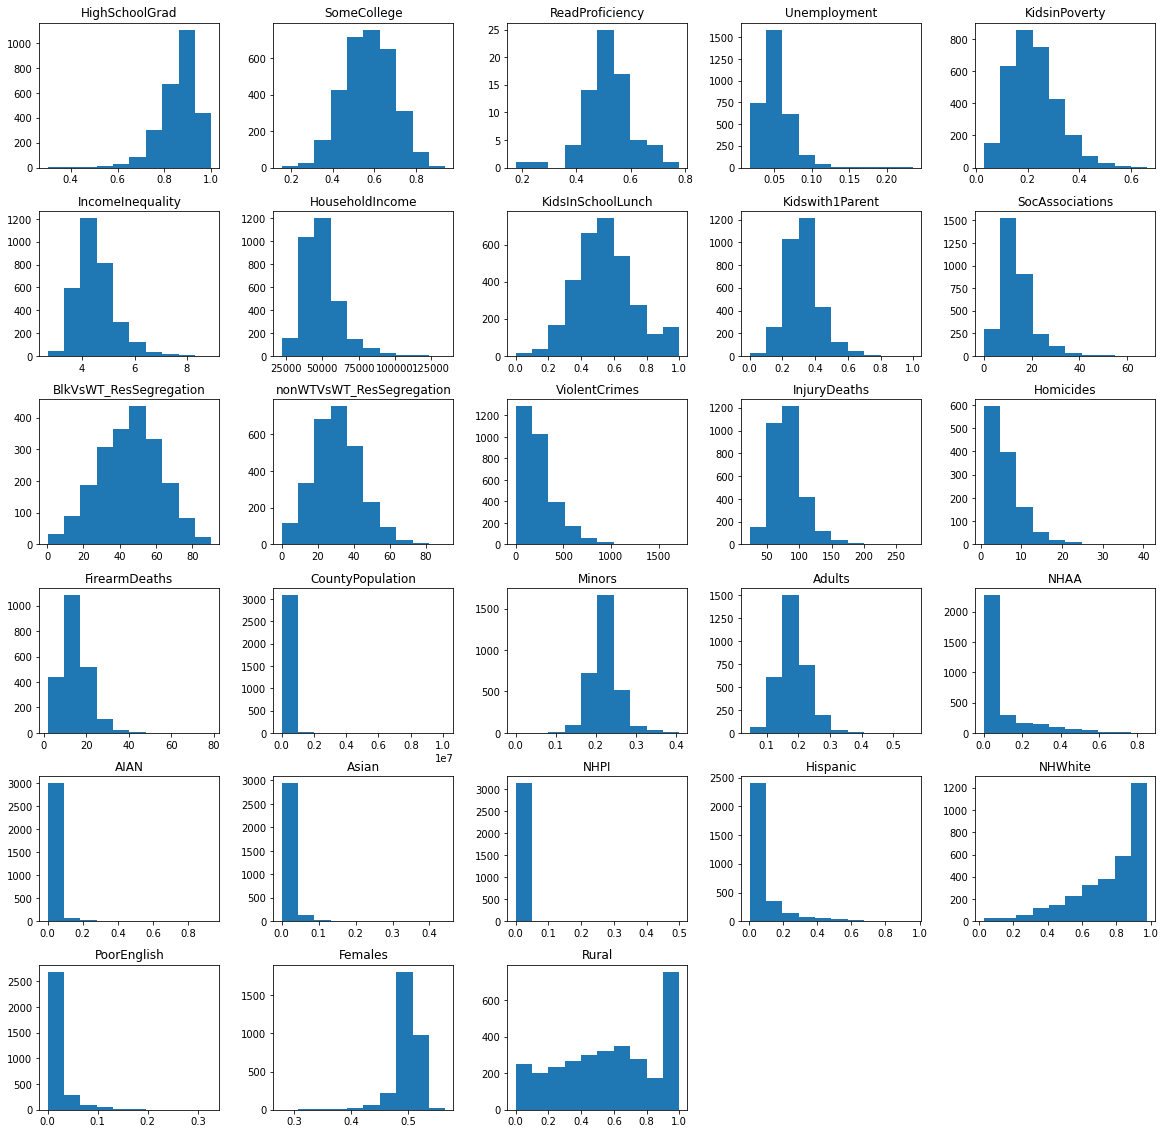

In [20]:
#Next plot all Histograms (all at once)
import pandas as pd
import matplotlib.pyplot as mp

sdoh_plotData.hist(figsize=(20,20),bins=10, grid=False);
#sdoh_plotData.hist(figsize=None,bins=10)

#Note to self:
#putting a semi-colon at th end of the code suppresses the array print-out that is typically generated before the charts...
#remove gridlines with grid=False

##### Comments: Almost all the series/columns have skewed distributions, while a few are somewhat centered/bell-shaped (e.g. someCollege, Blk vs. White Segregation)

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

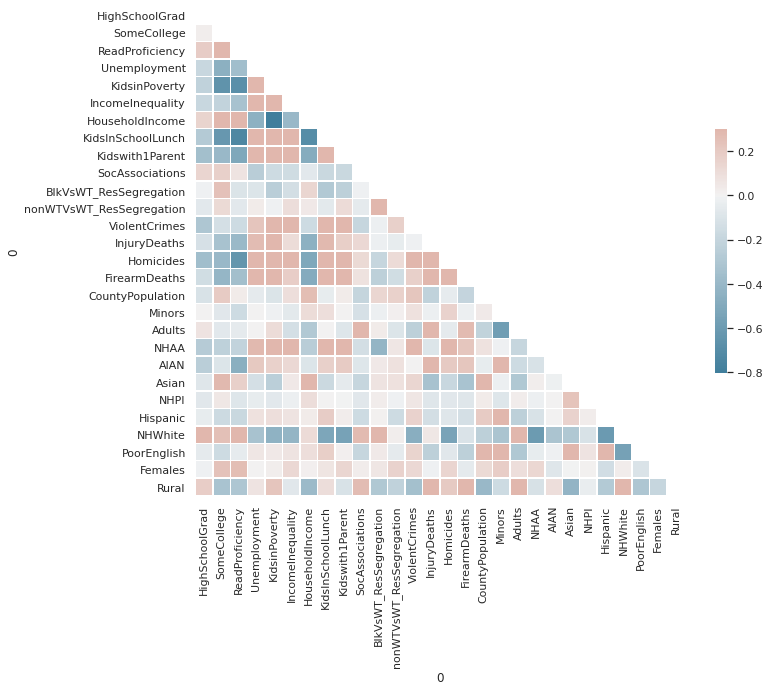

In [21]:
#Correlation Plots
import seaborn as sns

sns.set_theme(style="white")

# Compute the correlation matrix
corr = sdoh_plotData.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

##### Comments: Correlations grid show some very strong pariwise relationships e.g kids in poverty is strongly but negatively correlated to college education & reading proficiency. Also strong negative relationship between kids in school lunch programs & household incoe (not surprising).

##### Seaborn is quite nice!

***Using the Information/Chart below for the Slack Discussion*** ... thinking this may be valuable for someone else looking to test this out themself with accessible data.

In [22]:
#Visualizing cholesterol levels and demographics 
#read in the test-patients datafile  
test_patients = pd.read_csv('/data/test_patients.csv')
test_patients.head()

# covid_data = pd.read_csv('/data/covid_wide.csv')
# covid_data.head()

,patient,age,sex,chf history,hypertension history,stroke history,vascular disease history,diabetes history,history,ekg,risk factors,troponin,smoker,total cholesterol,hdl cholesterol,systolic bp,bp medicine
0,E40794,82,M,No,Yes,Yes,Yes,Yes,Moderately suspicious,Normal,4,3.8,No,214,64,92,Yes
1,E57853,22,M,No,No,Yes,No,No,Slightly suspicious,Non-specific repolarization,2,2.3,No,146,33,102,No
2,E63841,32,F,Yes,Yes,Yes,Yes,Yes,Slightly suspicious,Non-specific repolarization,4,1.3,No,195,31,115,Yes
3,E87700,21,F,Yes,Yes,Yes,No,No,Highly suspicious,Non-specific repolarization,1,1.1,No,152,42,82,Yes
4,E49662,52,F,Yes,Yes,No,No,No,Slightly suspicious,Normal,5,1.2,No,214,58,85,Yes


Text(0.5, 1.0, 'Correlation Plot of test_patients dataframe (source:/data/test_patients.csv)')

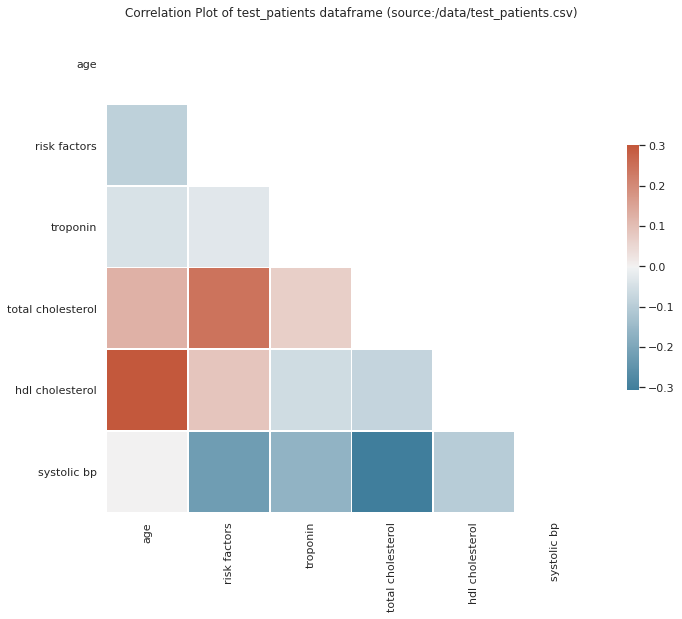

In [23]:
#Correlation Plots

# Compute the correlation matrix
#df.corr(method ='Spearman')
corr = test_patients.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Plot of test_patients dataframe (source:/data/test_patients.csv)')



---



## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  Next week, I'll show you how to **pull** down my comments.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Follow the instruction on the prompt below to either ssave and submit your work, or continue working.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

---

In [24]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add week13_assignment_2.ipynb
    !git commit -a -m "Submitting the week 12 programming assignment"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main 1086fed] Submitting the week 12 programming assignment
 2 files changed, 4041 insertions(+), 3 deletions(-)
 create mode 100644 week13/week13_assignment_2.ipynb
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 185.48 KiB | 8.43 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: This repository moved. Please use the new location:
remote:   git@github.com:AI2Z/hds5210-2022.git
To github.com:ai2z/hds5210-2022.git
   efb5877..1086fed  main -> main
